# Does including trans men in our distribution affect our assumption of normality? 

## We ran a model to investigate.

Upperbound for the estimates of the prevalence of being transgender in a given population is 2% https://www.sciencedirect.com/science/article/pii/S0889852919300015

If we assume that their heights (or weights, surface areas*,  etc) are distributed roughly akin to to the cisgender female adult population, then we can see how including them in a sample of cis-men affects the assumption of normality in a distribution. (Using data on the mean and s.d. of overall male and female heights: https://www.usablestats.com/lessons/normal)

*This assumption may not be strictly true for post-op men, but we take that to be a relatively small change relative to an adult’s entire body surface area on average.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

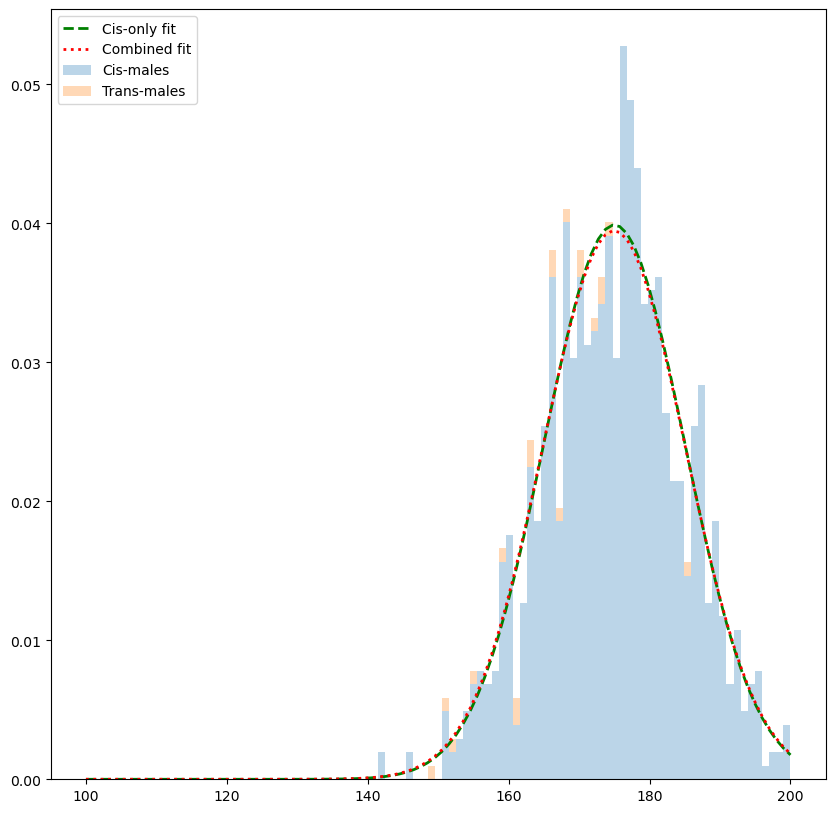

In [2]:
## Snippet of code to show that inclusion of trans males doesn't affect normality of heights very much

# Number of cis men in random sample
cis_num = 1000

mu_cismale, sigma_cismale = 175, 10 # mean and standard deviation
s_cismale = np.random.normal(mu_cismale, sigma_cismale, cis_num)

## Upperbound, ~2% of a population might be trans https://www.sciencedirect.com/science/article/pii/S0889852919300015
## I naively assume transmale height distribution is akin to that of cis-female
mu_transmale, sigma_transmale = 165, 9
s_transmale = np.random.normal(mu_transmale, sigma_transmale, round(cis_num*0.02))

fix, ax = plt.subplots(figsize=(10,10))

(mu, sigma) = norm.fit(np.concatenate((s_cismale, s_transmale)))

bins = np.linspace(100, 200, 100)
plt.hist([s_cismale,s_transmale], bins, stacked=True, density=True, alpha=0.3)

y_cis = norm.pdf(bins, mu_cismale, sigma_cismale)
l_cis = plt.plot(bins, y_cis, 'g--', linewidth=2, label= 'Cis-only')

y_combined = norm.pdf( bins, mu, sigma)
l_combined = plt.plot(bins, y_combined, 'r:', linewidth=2, label= 'Combined')

plt.legend(loc='upper left', labels=['Cis-only fit','Combined fit','Cis-males','Trans-males'])

plt.show()

## For the number of people likely to visit a shop in a year, the normal distribution fit to the data is barely affected at all by the inclusion of trans men.

One problem with this model might be that the data source we used for the means *already* includes trans men and women in their respective categories in the data, but then the analysis still shows how robust the distributions are even if we straight up misclassify individuals by gender at the 2% level.
